In [1]:
import pandas, numpy as np, os
import scipy
from scipy import stats
import rpy2.robjects.lib.ggplot2 as ggplot2
%load_ext rpy2.ipython
import config
%R library('stargazer')

/usr/local/lib/python2.7/dist-packages/rpy2/robjects/lib/ggplot2.py:67: UserWarning: This was designed againt ggplot2 version 2.1.0 but you have 3.3.0
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Please cite as: 


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 


  warnings.warn(x, RRuntimeWarning)


array(['stargazer', 'ggplot2', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], dtype='|S9')

In [2]:
languages = ['eng', 'spa', 'deu', 'rus', 'heb', 'fra','ces','swe', 'pol', 'ron','ita','por','nld'] 
# note that this is all of the languages in OPUS

# Load IDS lists

In [3]:
allcodes = pandas.read_table(os.path.join(config.paths['IDS'],'allcodes.txt'), header=None, sep=' ',names=['id','gc', 'iso'])
languagesOfInterest = allcodes[allcodes['iso'].isin(languages)]
languagesOfInterest

,id,gc,iso
21,170,ital1282,ita
22,171,stan1290,fra
27,176,stan1288,spa
29,178,port1283,por
30,179,roma1327,ron
38,187,swed1254,swe
41,190,stan1293,eng
42,191,dutc1256,nld
45,194,stan1295,deu
53,202,czec1258,ces


In [4]:
set(languages) - set(allcodes['iso'].tolist())

{'heb'}

Only Hebrew is missing

In [5]:
def readTable(id):
    df = pandas.read_table(os.path.join(config.paths['IDS'],'ids', str(id)+'.txt'), encoding='utf-8', sep='\t')
    # eliminate trailing spaces in the IDS dataset
    df['Name'] = [x.strip() for x in df.Name]
    df['Parameter'] = [x.strip() for x in df.Parameter]
    df['Language'] = [x.strip() for x in df.Language]
    return(df)
    
ids_selected = pandas.concat([readTable(id) for id in languagesOfInterest['id']])

In [6]:
ids_selected.iloc[6000:6100].Name.tolist()

[u'dentro',
 u'fora',
 u'debaixo',
 u'em cima',
 u'so\u0302bre',
 u'espac\u0327o',
 u'lugar',
 u'po\u0302r',
 u'sentar-se',
 u'deitar-se',
 u'estar em pe\u0301',
 u'ficar em pe\u0301',
 u'ficar',
 u'restos',
 u'colecionar',
 u'reunir',
 u'captar',
 u'empilhar',
 u'juntar',
 u'unir',
 u'separar',
 u'dividir',
 u'abrir',
 u'aberto',
 u'fechar',
 u'cobrir',
 u'esconder',
 u'alto',
 u'elevado',
 u'baixo',
 u'cume',
 u'topo',
 u'fundo',
 u'extremidade',
 u'fim',
 u'ponta',
 u'afiado',
 u'agudo',
 u'beira',
 u'borda',
 u'lado',
 u'meio',
 u'centro',
 u'direita',
 u'esquerda',
 u'perto',
 u'pro\u0301ximo',
 u'longe',
 u'leste',
 u'este',
 u'oeste',
 u'norte',
 u'sul',
 u'crescer',
 u'medir',
 u'palmo',
 u'brac\u0327a',
 u'grande',
 u'pequeno',
 u'comprido',
 u'alto',
 u'curto',
 u'largo',
 u'estreito',
 u'grosso',
 u'fino',
 u'delgado',
 u'fundo',
 u'raso',
 u'baixo',
 u'plano',
 u'chato',
 u'direito',
 u'reto',
 u'torcido',
 u'torto',
 u'gancho',
 u'esquina',
 u'canto',
 u'cruz',
 u'quadrado

In [7]:
ids_selected['concept'] = ['-'.join(x.split('-')[0:2]) for x in ids_selected['ID']]
ids_selected['concept_word'] = ids_selected['concept'].map(str)+ids_selected['Name']
ids_selected.shape

(20510, 9)

In [8]:
# Example table
ids_selected.loc[ids_selected.Language == 'French']

,ID,Name,Parameter,Language,Frequency,Confidence,References,concept,concept_word
0,1-100-171-1,monde,world,French,NaN,NaN,NaN,1-100,1-100monde
1,1-210-171-1,terre,"earth, land",French,NaN,NaN,NaN,1-210,1-210terre
2,1-212-171-1,terre,"earth=ground, soil",French,NaN,NaN,NaN,1-212,1-212terre
3,1-212-171-3,sol,"earth=ground, soil",French,NaN,NaN,NaN,1-212,1-212sol
4,1-213-171-1,poussière,dust,French,NaN,NaN,NaN,1-213,1-213poussière
5,1-214-171-1,boue,mud,French,NaN,NaN,NaN,1-214,1-214boue
6,1-215-171-1,sable,sand,French,NaN,NaN,NaN,1-215,1-215sable
7,1-220-171-1,montagne,"mountain, hill",French,NaN,NaN,NaN,1-220,1-220montagne
8,1-220-171-3,colline,"mountain, hill",French,NaN,NaN,NaN,1-220,1-220colline
9,1-222-171-1,falaise,"cliff, precipice",French,NaN,NaN,NaN,1-222,1-222falaise


In [9]:
# number of unique concepts (not all languages will have all terms populated)
print(len(np.unique(ids_selected['concept'])))

1310


In [10]:
ids_selected.iloc[0]

ID              1-100-170-1
Name                  mondo
Parameter             world
Language            Italian
Frequency               NaN
Confidence              NaN
References              NaN
concept               1-100
concept_word     1-100mondo
Name: 0, dtype: object

In [11]:
concept_counts = ids_selected.groupby('concept').Language.nunique().reset_index()
concepts_with_sufficient_coverage = concept_counts.loc[concept_counts.Language >= 9].concept

In [12]:
ids_selected.loc[ids_selected.concept == concepts_with_sufficient_coverage[0]][['Name','Language']]

,Name,Language
0,mondo,Italian
0,monde,French
0,mundo,Spanish
0,mundo,Portuguese
0,lume,Romanian
0,verld,Swedish
1,värld,Swedish
0,world,English
0,wereld,Dutch
0,Welt,German


In [13]:
ids_with_coverage = ids_selected.loc[ids_selected.concept.isin(concepts_with_sufficient_coverage)]
concepts_per_language = ids_with_coverage.groupby('Language').concept.nunique().reset_index()
concepts_per_language.sort_values(by='concept')

,Language,concept
8,Romanian,918
11,Swedish,1241
6,Polish,1286
0,Czech,1304
9,Russian,1305
4,German,1309
1,Dutch,1310
2,English,1310
3,French,1310
5,Italian,1310


Coverage is generally decent, with the exceptions of Romanian. Note that this is just the number of items in the concept dictionary; the actual number of matches depends on the match of the orthography used in the Google or OPUS dataset and whatever is used in the IDS data. 

# Issues with IDS Orthographic Representations

Good news is that it is encoded in UTF-8 but there is some dataset-specific variation  
[ ] ñ encoded peculiarly in Spanish (ɲ).   
[ ] Russian isn't really in Cyrillic (nor a clear latinate transcription) https://en.wikipedia.org/wiki/Romanization_of_Russian  

In [14]:
print(ids_selected[ids_selected['Language'] == 'Spanish']['Name'].iloc[6])

montaɲa


In [15]:
print(' '.join(ids_selected[ids_selected['Language'] == 'Russian'].iloc[1:100].Name))

svet zemlja počva pyl grjaz pesok gora cholm xolm skala ravnina pole dolina ostrov materik bereg poberež ́je pečera voda more zatiš ́je burnoe more pena okean ozero zaliv laguna rif mys volna (val) morskoj priliv i otliv nizšaja točka otliva vysšaja točka priliva reka potok ručej vodovorot ključ rodnik istočnik kolodec boloto vodopad les derevo derevo kamen zemle trjasenie nebo solnce luna (mesjac) zvezda molnija grom molnija burja raduga svet temnota t ́ma mrak ten ́ rosa vozdux veter oblako tuča tuman mgla dožd sneg led pogoda ogon plamja dym pepel poslednie krasnye ugol ́ki žeč goret zažeč tušit ́ gasit spička drova drevesnyj ugal čelovek mužčina ženščina mužskoj ženskij mal ́čik junoša podrostok devočka devuška rebenok (deti) mladenec muž


# Lexical Suprisal

In [16]:
import ids_analysis
reload(ids_analysis)

<module 'ids_analysis' from 'ids_analysis.pyc'>

In [17]:
ids_selected['clean_word'] = [ids_analysis.clean_word(x) for x in ids_selected['Name']]
ids_clean = ids_selected[~ids_selected['clean_word'].isnull()]
ids_clean['word'] = ids_clean['clean_word']

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [18]:
ids_clean.loc[ids_clean.Language == 'French'].Name.tolist()

[u'monde',
 u'terre',
 u'terre',
 u'sol',
 u'poussie\u0300re',
 u'boue',
 u'sable',
 u'montagne',
 u'colline',
 u'falaise',
 u'escarpement',
 u'plaine',
 u'campagne',
 u'valle\u0301e',
 u'i\u0302le',
 u'continent',
 u'rivage',
 u'co\u0302te',
 u'littoral',
 u'grotte',
 u'eau',
 u'mer',
 u'e\u0301tale',
 u'trouble',
 u'agite\u0301',
 u'e\u0301cume',
 u'mousse',
 u'oce\u0301an',
 u'lac',
 u'golfe',
 u'baie',
 u'lagune',
 u're\u0301cif',
 u'promontoire',
 u'pointe',
 u'vague',
 u'mare\u0301e',
 u'fleuve',
 u'rivie\u0300re',
 u'ruisseau',
 u'tourbillon',
 u'source',
 u'puits',
 u'marais',
 u'mare\u0301cage',
 u'cascade',
 u'bois',
 u'fore\u0302t',
 u'arbre',
 u'bois',
 u'pierre',
 u'roc',
 u'rocher',
 u'se\u0301isme',
 u'ciel',
 u'soleil',
 u'lune',
 u'e\u0301toile',
 u'e\u0301clair',
 u'tonnerre',
 u'foudre',
 u'orage',
 u'tempe\u0302te',
 u'arc-en-ciel',
 u'lumie\u0300re',
 u'obscurite\u0301',
 u'te\u0301ne\u0300bres',
 u'ombre',
 u'rose\u0301e',
 u'air',
 u'vent',
 u'nuage',
 u'brume',


In [19]:
wordlist = {}
conceptlist = {}
for language in languages:
    df = ids_clean[ids_clean.Language == ids_analysis.ids_to_language[language]]
    conceptlist[language] = df
    wordlist[language] = df.Name.tolist()

In [20]:
ids_clean.loc[ids_clean.Language == 'French'].iloc[0:10].word.tolist()

[u'monde',
 u'terre',
 u'terre',
 u'sol',
 u'poussie\u0300re',
 u'boue',
 u'sable',
 u'montagne',
 u'colline',
 u'falaise']

In [36]:
reload(ids_analysis)
reload(config)
wordDF = ids_analysis.retrieveMeasuresForIDSitems(config.paths['current_filtered'], wordlist, 
    conceptlist, languages, 'OPUS')

FAILED TO CONVERT
2
[u'2']
FAILED TO CONVERT
5
[u'5']
FAILED TO CONVERT
3
[u'3']
FAILED TO CONVERT
1
[u'1']
FAILED TO CONVERT
4
[u'4']
FAILED TO CONVERT
♪
[u'\u266a']
FAILED TO CONVERT
i
[u'i']
FAILED TO CONVERT
6
[u'6']
FAILED TO CONVERT
a
[u'a']
FAILED TO CONVERT
8
[u'8']
FAILED TO CONVERT
7
[u'7']
FAILED TO CONVERT
9
[u'9']
FAILED TO CONVERT
0
[u'0']
FAILED TO CONVERT
o
[u'o']
FAILED TO CONVERT
'
[u"'"]
FAILED TO CONVERT
c
[u'c']
FAILED TO CONVERT
u
[u'u']
FAILED TO CONVERT
e
[u'e']
FAILED TO CONVERT
l
[u'l']
FAILED TO CONVERT
¶
[u'\xb6']
FAILED TO CONVERT
s
[u's']
FAILED TO CONVERT
b
[u'b']
FAILED TO CONVERT
x
[u'x']
FAILED TO CONVERT
d
[u'd']
FAILED TO CONVERT
y
[u'y']
FAILED TO CONVERT
m
[u'm']
FAILED TO CONVERT
p
[u'p']
FAILED TO CONVERT
v
[u'v']
FAILED TO CONVERT
t
[u't']
FAILED TO CONVERT
r
[u'r']
FAILED TO CONVERT
n
[u'n']
FAILED TO CONVERT
g
[u'g']
FAILED TO CONVERT
№
[u'\u2116']
FAILED TO CONVERT
j
[u'j']
FAILED TO CONVERT
k
[u'k']
FAILED TO CONVERT
f
[u'f']
FAILED TO CONVE

In [37]:
ids_analysis.get_coverage_for_dataset(wordDF, concepts_per_language)

,Language,concepts_after_join,concept,hit_rate
0,Czech,882,1304,0.676380
9,Russian,981,1305,0.751724
8,Romanian,729,918,0.794118
6,Polish,1050,1286,0.816485
11,Swedish,1048,1241,0.844480
3,French,1177,1310,0.898473
10,Spanish,1179,1310,0.900000
2,English,1192,1310,0.909924
5,Italian,1193,1310,0.910687
7,Portuguese,1204,1310,0.919084


In [38]:
example_french = ids_clean[ids_clean['Language'] == 'French'].copy()
example_french['in_intersection'] = example_french['Name'].isin(wordDF.loc[wordDF.Language == 'French'].Name)
example_french.loc[~example_french.in_intersection]

,ID,Name,Parameter,Language,Frequency,Confidence,References,concept,concept_word,clean_word,word,in_intersection
67,1-590-171-1,arc-en-ciel,rainbow,French,NaN,NaN,NaN,1-590,1-590arc-en-ciel,arcenciel,arcenciel,False
136,2-460-171-1,grand-père,grandfather,French,NaN,NaN,NaN,2-460,2-460grand-père,grandpère,grandpère,False
138,2-470-171-1,grand-mère,grandmother,French,NaN,NaN,NaN,2-470,2-470grand-mère,grandmère,grandmère,False
140,2-480-171-1,petit-fils,grandson,French,NaN,NaN,NaN,2-480,2-480petit-fils,petitfils,petitfils,False
141,2-490-171-1,petite-fille,granddaughter,French,NaN,NaN,NaN,2-490,2-490petite-fille,petitefille,petitefille,False
154,2-610-171-1,beau-père,father-in-law (of a man),French,NaN,NaN,NaN,2-610,2-610beau-père,beaupère,beaupère,False
155,2-611-171-1,beau-père,father-in-law (of a woman),French,NaN,NaN,NaN,2-611,2-611beau-père,beaupère,beaupère,False
156,2-620-171-1,belle-mère,mother-in-law (of a man),French,NaN,NaN,NaN,2-620,2-620belle-mère,bellemère,bellemère,False
157,2-621-171-1,belle-mère,mother-in-law (of a woman),French,NaN,NaN,NaN,2-621,2-621belle-mère,bellemère,bellemère,False
161,2-640-171-3,belle-fille,daughter-in-law (of a man),French,NaN,NaN,NaN,2-640,2-640belle-fille,bellefille,bellefille,False


In [39]:
example_czech = ids_clean[ids_clean['Language'] == 'Czech'].copy()
example_czech['in_intersection'] = example_czech['Name'].isin(wordDF.loc[wordDF.Language == 'Czech'].Name)      

In [40]:
print(' '.join(example_czech.loc[~example_czech.in_intersection].Name))

pahorek sráz rovina dolina pevnina bezvětří úskalí zřídlo déšt’ hořeti páliti žhnouti zapáliti uhasiti zničiti sirka zápalka dět’átko chot’ chot’ ženitba vdavky sourozenec kmet ujec ujec bratrovec sestřenec bratrovna zet’ zet’ pastorek pastorkyně sirota živočich pásti pastucha chlév bahnice sele kůzle mul luňák šupina žábra ulita lastura rejnok hnida stonožka škorpion moskyt světluška hlemýžd’ kajman lupa ohon chvost leb líce obrv mrkati chřípí hlen pysk šíje týl plece lýtko šlépěj hrud’ ňadro vemeno výmě moudí pyj dýchati zívati škytati kašlati kýchati plivati dáviti zvraceti blíti kousati hryzati lízati kapati spátí chrápati sníti probuditi bdíti prděti bzdíti močiti souložiti jebati zploditi roditi březí počíti žíti umříti utopený zabíti usmrtiti pochovati pohřbíti nastuzení katar podlitina pohmožděnina svrab vřídek hojiti léčiti mdlý lenivý lysý kulhavý jísti nezralý píti sáti žvýkati hltati dusiti škrtiti vařiti péci smažiti péci talířek loupati prosíti procediti škrábati míchati 

In [41]:
example_english = ids_clean[ids_clean['Language'] == 'English'].copy()
example_english['in_intersection'] = example_english['Name'].isin(wordDF.loc[wordDF.Language == 'English'].Name)      
example_english.loc[~example_english.in_intersection]

,ID,Name,Parameter,Language,Frequency,Confidence,References,concept,concept_word,clean_word,word,in_intersection
34,1-353-190-1,lowtide,lowtide,English,NaN,NaN,NaN,1-353,1-353lowtide,lowtide,lowtide,False
35,1-354-190-1,hightide,hightide,English,NaN,NaN,NaN,1-354,1-354hightide,hightide,hightide,False
139,2-610-190-1,father-in-law,father-in-law (of a man),English,NaN,NaN,NaN,2-610,2-610father-in-law,fatherinlaw,fatherinlaw,False
140,2-611-190-1,father-in-law,father-in-law (of a woman),English,NaN,NaN,NaN,2-611,2-611father-in-law,fatherinlaw,fatherinlaw,False
141,2-620-190-1,mother-in-law,mother-in-law (of a man),English,NaN,NaN,NaN,2-620,2-620mother-in-law,motherinlaw,motherinlaw,False
142,2-621-190-1,mother-in-law,mother-in-law (of a woman),English,NaN,NaN,NaN,2-621,2-621mother-in-law,motherinlaw,motherinlaw,False
143,2-630-190-1,son-in-law,son-in-law (of a man),English,NaN,NaN,NaN,2-630,2-630son-in-law,soninlaw,soninlaw,False
144,2-631-190-1,son-in-law,son-in-law (of a woman),English,NaN,NaN,NaN,2-631,2-631son-in-law,soninlaw,soninlaw,False
145,2-640-190-1,daughter-in-law,daughter-in-law (of a man),English,NaN,NaN,NaN,2-640,2-640daughter-in-law,daughterinlaw,daughterinlaw,False
146,2-641-190-1,daughter-in-law,daughter-in-law (of a woman),English,NaN,NaN,NaN,2-641,2-641daughter-in-law,daughterinlaw,daughterinlaw,False


- Spot checked some translations with Google Translator
- Does the piantadosi et al. (2011) data have nonzero counts for these items? Yes, for some but not all of the items. Some of these may have been filtered spuriously by limiting to forms that Aspell recognizes as words. So we can't do a direct comparison.
- Note that in looking at the English dataset we can see that a large number of items are not present, because some of the items are expressed in terms of multiple words (day-after-tomorrow), are capitalized (days of the week), or include punctuation (how?, what?). So all languages will have fewer than the 1310 concept
- For some of these, they are not present in the unigram counts for the relevant language, e.g. Czech `písek`

In [42]:
%R -i wordDF

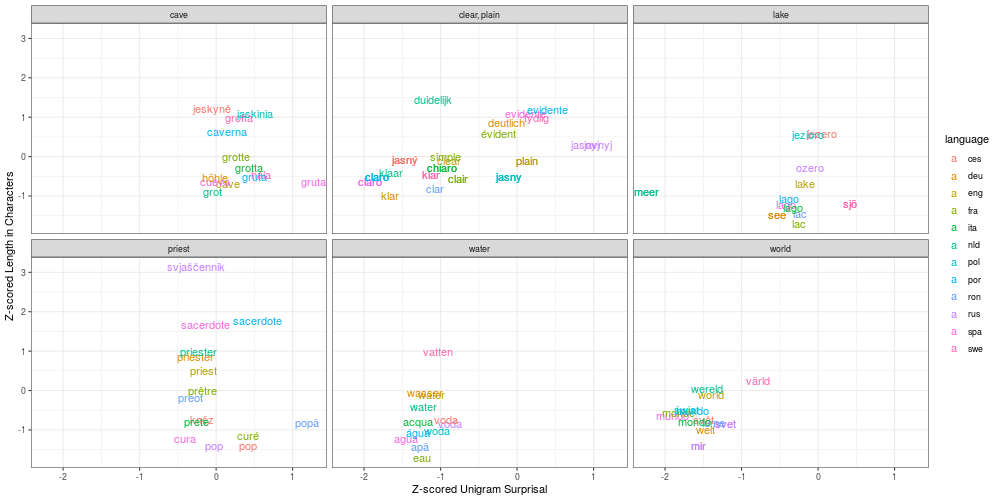

In [43]:
%%R -w 1000 -h 500
# example of the relationship across languages across a selection of concepts
ggplot(data=subset(wordDF, concept %in% c('1-100', '22-180', '1-330', '17-340', '1-310', '1-280')
)) + geom_text(aes(x=unigramSurprisal_z, y=character_n_z, colour=language, label=word)) + theme_bw(
) + facet_wrap(~Parameter) + xlab('Z-scored Unigram Surprisal') + ylab('Z-scored Length in Characters')

In [45]:
wordDF_Google1T = ids_analysis.retrieveMeasuresForIDSitems(config.paths['current_filtered'], wordlist, 
    conceptlist, languages, 'Google1T')

ids_analysis.py:106: RuntimeWarning: divide by zero encountered in log
  lex['unigramSurprisal'] = -1 * np.log(lex['frequency'] / sum(lex['frequency']))


In [46]:
ids_analysis.get_coverage_for_dataset(wordDF_Google1T, concepts_per_language)

,Language,concepts_after_join,concept,hit_rate
0,Czech,778,1304,0.596626
6,Polish,907,1286,0.705288
8,Romanian,686,918,0.747277
10,Swedish,1003,1241,0.808219
5,Italian,1144,1310,0.873282
7,Portuguese,1155,1310,0.881679
9,Spanish,1156,1310,0.882443
3,French,1160,1310,0.885496
4,German,1183,1309,0.903743
1,Dutch,1187,1310,0.906107


In [47]:
%R -i wordDF_Google1T

In [49]:
wordDF_GoogleBooks2012 = ids_analysis.retrieveMeasuresForIDSitems(config.paths['current_filtered'], wordlist, 
    conceptlist, languages, 'GoogleBooks2012')

FAILED TO CONVERT
»
[u'\xbb']
FAILED TO CONVERT
«
[u'\xab']
FAILED TO CONVERT
1
[u'1']
FAILED TO CONVERT
2
[u'2']
FAILED TO CONVERT
3
[u'3']
FAILED TO CONVERT
Федерации
[u'\u0424', u'\u0435', u'\u0434', u'\u0435', u'\u0440', u'\u0430', u'\u0446', u'\u0438', u'\u0438']
FAILED TO CONVERT
5
[u'5']
FAILED TO CONVERT
Российской
[u'\u0420', u'\u043e', u'\u0441', u'\u0441', u'\u0438', u'\u0439', u'\u0441', u'\u043a', u'\u043e', u'\u0439']
FAILED TO CONVERT
В
[u'\u0412']
FAILED TO CONVERT
4
[u'4']
FAILED TO CONVERT
°
[u'\xb0']
FAILED TO CONVERT
Совета
[u'\u0421', u'\u043e', u'\u0432', u'\u0435', u'\u0442', u'\u0430']
FAILED TO CONVERT
0
[u'0']
FAILED TO CONVERT
Союза
[u'\u0421', u'\u043e', u'\u044e', u'\u0437', u'\u0430']
FAILED TO CONVERT
О
[u'\u041e']
FAILED TO CONVERT
С
[u'\u0421']
FAILED TO CONVERT
№
[u'\u2116']
FAILED TO CONVERT
6
[u'6']
FAILED TO CONVERT
i
[u'i']
FAILED TO CONVERT
8
[u'8']
FAILED TO CONVERT
И
[u'\u0418']
FAILED TO CONVERT
7
[u'7']
FAILED TO CONVERT
Советского
[u'\u0421',

FAILED TO CONVERT
Золотой
[u'\u0417', u'\u043e', u'\u043b', u'\u043e', u'\u0442', u'\u043e', u'\u0439']
FAILED TO CONVERT
Интернационал
[u'\u0418', u'\u043d', u'\u0442', u'\u0435', u'\u0440', u'\u043d', u'\u0430', u'\u0446', u'\u0438', u'\u043e', u'\u043d', u'\u0430', u'\u043b']
FAILED TO CONVERT
Воронежской
[u'\u0412', u'\u043e', u'\u0440', u'\u043e', u'\u043d', u'\u0435', u'\u0436', u'\u0441', u'\u043a', u'\u043e', u'\u0439']
FAILED TO CONVERT
Волгу
[u'\u0412', u'\u043e', u'\u043b', u'\u0433', u'\u0443']
FAILED TO CONVERT
Записок
[u'\u0417', u'\u0430', u'\u043f', u'\u0438', u'\u0441', u'\u043e', u'\u043a']
FAILED TO CONVERT
Крымской
[u'\u041a', u'\u0440', u'\u044b', u'\u043c', u'\u0441', u'\u043a', u'\u043e', u'\u0439']
FAILED TO CONVERT
Армией
[u'\u0410', u'\u0440', u'\u043c', u'\u0438', u'\u0435', u'\u0439']
FAILED TO CONVERT
Спасителя
[u'\u0421', u'\u043f', u'\u0430', u'\u0441', u'\u0438', u'\u0442', u'\u0435', u'\u043b', u'\u044f']
FAILED TO CONVERT
Институтом
[u'\u0418', u'\u043

[u'\u041c', u'\u0430', u'\u043a', u'\u0435', u'\u0434', u'\u043e', u'\u043d', u'\u0441', u'\u043a', u'\u043e', u'\u0433', u'\u043e']
FAILED TO CONVERT
Туркестанского
[u'\u0422', u'\u0443', u'\u0440', u'\u043a', u'\u0435', u'\u0441', u'\u0442', u'\u0430', u'\u043d', u'\u0441', u'\u043a', u'\u043e', u'\u0433', u'\u043e']
FAILED TO CONVERT
Марка
[u'\u041c', u'\u0430', u'\u0440', u'\u043a', u'\u0430']
FAILED TO CONVERT
Юность
[u'\u042e', u'\u043d', u'\u043e', u'\u0441', u'\u0442', u'\u044c']
FAILED TO CONVERT
НЕ
[u'\u041d', u'\u0415']
FAILED TO CONVERT
Полесья
[u'\u041f', u'\u043e', u'\u043b', u'\u0435', u'\u0441', u'\u044c', u'\u044f']
FAILED TO CONVERT
Землей
[u'\u0417', u'\u0435', u'\u043c', u'\u043b', u'\u0435', u'\u0439']
FAILED TO CONVERT
Дальневосточного
[u'\u0414', u'\u0430', u'\u043b', u'\u044c', u'\u043d', u'\u0435', u'\u0432', u'\u043e', u'\u0441', u'\u0442', u'\u043e', u'\u0447', u'\u043d', u'\u043e', u'\u0433', u'\u043e']
FAILED TO CONVERT
Новым
[u'\u041d', u'\u043e', u'\u0432

FAILED TO CONVERT
Расчет
[u'\u0420', u'\u0430', u'\u0441', u'\u0447', u'\u0435', u'\u0442']
FAILED TO CONVERT
Один
[u'\u041e', u'\u0434', u'\u0438', u'\u043d']
FAILED TO CONVERT
Председателю
[u'\u041f', u'\u0440', u'\u0435', u'\u0434', u'\u0441', u'\u0435', u'\u0434', u'\u0430', u'\u0442', u'\u0435', u'\u043b', u'\u044e']
FAILED TO CONVERT
Ч
[u'\u0427']
FAILED TO CONVERT
Редакция
[u'\u0420', u'\u0435', u'\u0434', u'\u0430', u'\u043a', u'\u0446', u'\u0438', u'\u044f']
FAILED TO CONVERT
МИР
[u'\u041c', u'\u0418', u'\u0420']
FAILED TO CONVERT
ЭФФЕКТИВНОСТИ
[u'\u042d', u'\u0424', u'\u0424', u'\u0415', u'\u041a', u'\u0422', u'\u0418', u'\u0412', u'\u041d', u'\u041e', u'\u0421', u'\u0422', u'\u0418']
FAILED TO CONVERT
Брестской
[u'\u0411', u'\u0440', u'\u0435', u'\u0441', u'\u0442', u'\u0441', u'\u043a', u'\u043e', u'\u0439']
FAILED TO CONVERT
Среди
[u'\u0421', u'\u0440', u'\u0435', u'\u0434', u'\u0438']
FAILED TO CONVERT
Дух
[u'\u0414', u'\u0443', u'\u0445']
FAILED TO CONVERT
ПОЛОЖЕНИЕ
[u'\

FAILED TO CONVERT
Британского
[u'\u0411', u'\u0440', u'\u0438', u'\u0442', u'\u0430', u'\u043d', u'\u0441', u'\u043a', u'\u043e', u'\u0433', u'\u043e']
FAILED TO CONVERT
Тома
[u'\u0422', u'\u043e', u'\u043c', u'\u0430']
FAILED TO CONVERT
Их
[u'\u0418', u'\u0445']
FAILED TO CONVERT
Пятидесятнице
[u'\u041f', u'\u044f', u'\u0442', u'\u0438', u'\u0434', u'\u0435', u'\u0441', u'\u044f', u'\u0442', u'\u043d', u'\u0438', u'\u0446', u'\u0435']
FAILED TO CONVERT
Рождеством
[u'\u0420', u'\u043e', u'\u0436', u'\u0434', u'\u0435', u'\u0441', u'\u0442', u'\u0432', u'\u043e', u'\u043c']
FAILED TO CONVERT
Верна
[u'\u0412', u'\u0435', u'\u0440', u'\u043d', u'\u0430']
FAILED TO CONVERT
Третий
[u'\u0422', u'\u0440', u'\u0435', u'\u0442', u'\u0438', u'\u0439']
FAILED TO CONVERT
БИОЛОГИИ
[u'\u0411', u'\u0418', u'\u041e', u'\u041b', u'\u041e', u'\u0413', u'\u0418', u'\u0418']
FAILED TO CONVERT
Одобрен
[u'\u041e', u'\u0434', u'\u043e', u'\u0431', u'\u0440', u'\u0435', u'\u043d']
FAILED TO CONVERT
Турецкой
[

In [50]:
reload(ids_analysis)
ids_analysis.get_coverage_for_dataset(wordDF_GoogleBooks2012, concepts_per_language)

,Language,concepts_after_join,concept,hit_rate
3,Russian,731,1305,0.560153
4,Spanish,1149,1310,0.877099
1,French,1160,1310,0.885496
2,German,1176,1309,0.898396
0,English,1194,1310,0.911450


In [51]:
%R -i wordDF_GoogleBooks2012

# Fixed Effects Regression Models

In [53]:
%%R
lm1 = lm(character_n_z ~ mean_surprisal_weighted_z + language + concept, data=wordDF)
lm1_sum = summary(lm1)
print(paste('nchar ~ mean trigram surprial:', lm1_sum$r.squared))

[1] "nchar ~ mean trigram surprial: 0.392060481971054"


In [55]:
%%R
lm3 = lm(character_n_z ~ unigramSurprisal_z + language + concept, data=wordDF)
lm3_sum = summary(lm3)
print(paste('nchar ~ unigram surprial:', lm3_sum$r.squared))

[1] "nchar ~ unigram surprial: 0.42592638957407"


# Mixed effects Regression Models

In [56]:
%%R
library('lme4')
mlm1 = lmer(character_n_z ~ mean_surprisal_weighted_z + (1|language) + (1|concept), data=wordDF, REML=F)
mlm1_sum = summary(mlm1)
mlm1_sum

/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: boundary (singular) fit: see ?isSingular

  warnings.warn(x, RRuntimeWarning)


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: character_n_z ~ mean_surprisal_weighted_z + (1 | language) +  
    (1 | concept)
   Data: wordDF

     AIC      BIC   logLik deviance df.resid 
 47765.9  47805.1 -23877.9  47755.9    18747 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6916 -0.6494 -0.0916  0.5523  6.4509 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 concept  (Intercept) 3.663e-01 6.052e-01
 language (Intercept) 2.450e-32 1.565e-16
 Residual             6.436e-01 8.022e-01
Number of obs: 18752, groups:  concept, 1303; language, 12

Fixed effects:
                          Estimate Std. Error t value
(Intercept)               0.021116   0.017946   1.177
mean_surprisal_weighted_z 0.250540   0.007734  32.395

Correlation of Fixed Effects:
            (Intr)
mn_srprsl__ -0.018
convergence code: 0
boundary (singular) fit: see ?isSingular



In [57]:
%%R
mlm2 = lmer(character_n_z ~ unigramSurprisal_z + (1|language) + (1|concept), data=wordDF, REML=F)
mlm2_sum = summary(mlm2)
print(mlm2_sum)


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: character_n_z ~ unigramSurprisal_z + (1 | language) + (1 | concept)
   Data: wordDF

     AIC      BIC   logLik deviance df.resid 
 46832.7  46871.9 -23411.4  46822.7    18747 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6082 -0.6433 -0.0717  0.5508  6.4632 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 concept  (Intercept) 3.485e-01 5.904e-01
 language (Intercept) 2.331e-32 1.527e-16
 Residual             6.123e-01 7.825e-01
Number of obs: 18752, groups:  concept, 1303; language, 12

Fixed effects:
                     Estimate Std. Error t value
(Intercept)        -0.0006307  0.0175171  -0.036
unigramSurprisal_z  0.3951021  0.0087058  45.384

Correlation of Fixed Effects:
            (Intr)
ungrmSrprs_ -0.041
convergence code: 0
boundary (singular) fit: see ?isSingular



In [59]:
%%R
anova(mlm1,mlm2)

Data: wordDF
Models:
mlm1: character_n_z ~ mean_surprisal_weighted_z + (1 | language) + 
mlm1:     (1 | concept)
mlm2: character_n_z ~ unigramSurprisal_z + (1 | language) + (1 | concept)
     Df   AIC   BIC logLik deviance  Chisq Chi Df Pr(>Chisq)    
mlm1  5 47766 47805 -23878    47756                             
mlm2  5 46833 46872 -23411    46823 933.15      0  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [61]:
%%R
library(lme4)
library(stargazer)
insertrow <- function(existingDF, newrow, r) {
 existingDF[seq(r+1,nrow(existingDF)+1),] <- existingDF[seq(r,nrow(existingDF)),]
 existingDF[r,] <- newrow
 existingDF
}

In [62]:
%%R
mixedEffectsComparison =function(M1, M2, r){
Tables <- stargazer(M1, M2, style="ajps",
 title="Here is a title", dep.var.labels.include = FALSE)

Tables <- as.data.frame(Tables)
Tables$Tables <- as.character(Tables$Tables)
randomeffect <- "{\\bf Random Effect} & & \\\\"
hline <- "\\hline"
newline <- "\\\\"
Tables <- insertrow(Tables, hline, r)
Tables <- insertrow(Tables,randomeffect,r+1)
Tables <- insertrow(Tables,hline,r+2)

num.concepts <- sapply(ranef(M1),nrow)[1]
num.languages <- sapply(ranef(M1),nrow)[2]    
stddev.M1.concepts <- attributes(VarCorr(M1)$"concept")$stddev
stddev.M1.languages <- attributes(VarCorr(M1)$"language")$stddev
stddev.M2.concepts <- attributes(VarCorr(M2)$"concept")$stddev
stddev.M2.languages <- attributes(VarCorr(M2)$"language")$stddev
number.of.concepts <- paste("\\# of Concepts & ", num.concepts, "&", num.concepts, "\\\\")
stddev.concepts <- paste("Concepts Standard Deviation & ", round(stddev.M1.concepts, 3), "&", round(stddev.M2.concepts, 3), "\\\\")
number.of.languages <- paste("\\# of Languages & ", num.languages, "&", num.languages, "\\\\")
stddev.languages <- paste("Languages Standard Deviation & ", round(stddev.M1.languages, 3),  round(stddev.M2.languages, 3), "\\\\")
    
Tables <- insertrow(Tables,number.of.concepts,r+3)
Tables <- insertrow(Tables,stddev.concepts,r+4)
Tables <- insertrow(Tables,newline,r+5)
Tables <- insertrow(Tables,number.of.languages,r+6)
Tables <- insertrow(Tables,stddev.languages,r+7)    
print(Tables)
}

In [70]:
%%R
sink('tables/mixed_effects.tex')
mixedEffectsComparison(mlm1,mlm2, r=25)
sink()

# Run Mixed Effects Model on Google 1T

In [64]:
%%R
library('lme4')
g1t_surp = lmer(character_n_z ~ mean_surprisal_weighted_z + (1|language) + (1|concept), data=wordDF_Google1T, REML=F)
g1t_surp_sum = summary(g1t_surp)
g1t_surp_sum

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: character_n_z ~ mean_surprisal_weighted_z + (1 | language) +  
    (1 | concept)
   Data: wordDF_Google1T

     AIC      BIC   logLik deviance df.resid 
 41837.4  41875.9 -20913.7  41827.4    16356 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3966 -0.6360 -0.0887  0.5467  6.4082 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 concept  (Intercept) 3.901e-01 6.246e-01
 language (Intercept) 1.728e-32 1.315e-16
 Residual             6.395e-01 7.997e-01
Number of obs: 16361, groups:  concept, 1302; language, 11

Fixed effects:
                          Estimate Std. Error t value
(Intercept)               0.033320   0.018649   1.787
mean_surprisal_weighted_z 0.202271   0.007368  27.454

Correlation of Fixed Effects:
            (Intr)
mn_srprsl__ -0.016
convergence code: 0
boundary (singular) fit: see ?isSingular



In [65]:
%%R
library('lme4')
g1t_freq = lmer(character_n_z ~ unigramSurprisal_z + (1|language) + (1|concept), data=wordDF_Google1T, REML=F)
g1t_freq_sum = summary(g1t_freq)
g1t_freq_sum

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: character_n_z ~ unigramSurprisal_z + (1 | language) + (1 | concept)
   Data: wordDF_Google1T

     AIC      BIC   logLik deviance df.resid 
 40767.7  40806.2 -20378.9  40757.7    16356 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4744 -0.6317 -0.0656  0.5520  6.4507 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 concept  (Intercept) 3.655e-01 6.045e-01
 language (Intercept) 1.619e-32 1.272e-16
 Residual             5.991e-01 7.740e-01
Number of obs: 16361, groups:  concept, 1302; language, 11

Fixed effects:
                    Estimate Std. Error t value
(Intercept)        -0.002276   0.018075  -0.126
unigramSurprisal_z  0.391915   0.008967  43.704

Correlation of Fixed Effects:
            (Intr)
ungrmSrprs_ -0.056
convergence code: 0
boundary (singular) fit: see ?isSingular



In [66]:
%%R
anova(g1t_surp, g1t_freq)

Data: wordDF_Google1T
Models:
g1t_surp: character_n_z ~ mean_surprisal_weighted_z + (1 | language) + 
g1t_surp:     (1 | concept)
g1t_freq: character_n_z ~ unigramSurprisal_z + (1 | language) + (1 | concept)
         Df   AIC   BIC logLik deviance  Chisq Chi Df Pr(>Chisq)    
g1t_surp  5 41837 41876 -20914    41827                             
g1t_freq  5 40768 40806 -20379    40758 1069.7      0  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Run Mixed Effects Models for Google Books 2012

In [67]:
%%R
library('lme4')
g12_surp = lmer(character_n_z ~ mean_surprisal_weighted_z + (1|language) + (1|concept), data=wordDF_GoogleBooks2012, REML=F)
g12_surp_sum = summary(g12_surp)
g12_surp_sum

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: character_n_z ~ mean_surprisal_weighted_z + (1 | language) +  
    (1 | concept)
   Data: wordDF_GoogleBooks2012

     AIC      BIC   logLik deviance df.resid 
 19961.7  19996.4  -9975.9  19951.7     7570 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0774 -0.6229 -0.0776  0.5311  5.1399 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 concept  (Intercept) 4.128e-01 6.425e-01
 language (Intercept) 3.298e-32 1.816e-16
 Residual             6.291e-01 7.931e-01
Number of obs: 7575, groups:  concept, 1292; language, 5

Fixed effects:
                          Estimate Std. Error t value
(Intercept)               0.003944   0.020428   0.193
mean_surprisal_weighted_z 0.247798   0.012070  20.529

Correlation of Fixed Effects:
            (Intr)
mn_srprsl__ -0.050
convergence code: 0
boundary (singular) fit: see ?isSingular



In [68]:
%%R
library('lme4')
g12_freq= lmer(character_n_z ~ unigramSurprisal_z + (1|language) + (1|concept), data=wordDF_GoogleBooks2012, REML=F)
g12_freq_sum = summary(g12_freq)
print(g12_freq_sum)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: character_n_z ~ unigramSurprisal_z + (1 | language) + (1 | concept)
   Data: wordDF_GoogleBooks2012

     AIC      BIC   logLik deviance df.resid 
 19768.3  19803.0  -9879.2  19758.3     7570 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2518 -0.6101 -0.0705  0.5240  5.1661 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 concept  (Intercept) 4.315e-01 6.568e-01
 language (Intercept) 3.181e-32 1.784e-16
 Residual             6.067e-01 7.789e-01
Number of obs: 7575, groups:  concept, 1292; language, 5

Fixed effects:
                   Estimate Std. Error t value
(Intercept)        -0.01416    0.02074  -0.683
unigramSurprisal_z  0.34836    0.01370  25.433

Correlation of Fixed Effects:
            (Intr)
ungrmSrprs_ -0.075
convergence code: 0
boundary (singular) fit: see ?isSingular



In [69]:
%%R
anova(g12_surp, g12_freq)

Data: wordDF_GoogleBooks2012
Models:
g12_surp: character_n_z ~ mean_surprisal_weighted_z + (1 | language) + 
g12_surp:     (1 | concept)
g12_freq: character_n_z ~ unigramSurprisal_z + (1 | language) + (1 | concept)
         Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    
g12_surp  5 19962 19996 -9975.9    19952                             
g12_freq  5 19768 19803 -9879.2    19758 193.37      0  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
